In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import random
import numpy as np

# Assignment 4: Diversification

Name: Tanay Kashyap

Student Number: 20938917

Due: 2021/11/14 at 11:59pm on Dropbox

What to submit: both your .ipynb and .pdf files.

Please make sure that each question outputs onto a new page. 
You can do this by inserting a code chunk with the following after each question.
```
%%latex
\newpage
```

## Rules
* You can follow the format of the template notebook to complete this assignment
* Make sure to define any new variables and functions that you are using. If you are doubtful whether you should explain a part of your code, it is better to explain it. 
* Please make sure to conclude your final answers in a statement (if applicable) at the end of each question.

## Objectives
At the end of the assignment, you will:
* Understand the value of diversification within a portfolio
* Understand how to improve diversification
* Understand the sharpe ratio and how it can be used to find a desireable portfolio

### Data 

For this assignment, you will be using **Industries.csv**, as well as **Yahoo Finance** (yfinance). This will be used to collect the share information, and then you will use Python to complete the remainder of the assignment. 

**Language:** Python 

**Libraries Allowed:** pandas, matplotlib, yfinance, random

## Q1 - Within-Industry Diversification
We will begin with exploring how diversification within industries can affect the portfolio value. For this question, you will be using stocks in the `industries.csv` file. 

### a)  Single Industry
#### i. 
You will begin with the technology industry. Pick 5 random stocks from that industry and list them the stocks and the industry. 

To pick the 5 random stocks, you are to use write a random_selection function, the specifics of which are given to you.

Extract the historical closing prices for each stock from `2019-01-01` and `2021-07-01` from Yahoo Finance. We will only be interested in monthly data, so include only the data from the first available day in any given month. Form an equally weighted porfolio where the initial investment size is $\$10,000$ (thus, you will put the same amount of money in each stock). Track the value of the portfolio over time and  convert the value to percentage returns.

Demonstrate convincingly the concept of diversification.  This can involve calculations, graphs, and should end with a discussion. 

In [2]:

##Start and end dates for the index
start_date = '2019-01-01'
end_date = '2021-07-01'

##Read in 'industries.csv'
ticker_lst=pd.read_csv('industries.csv')

##drop useless index column
new_lst=ticker_lst.drop(['Unnamed: 0'], axis=1)


def random_selection(df,industry_name,num,seed):
    
    #Created a filtered dataframe
    sector_list=df[df.industry==industry_name]
    
    # Create Empty List
    ticker_1st=[]
    
    #Iterate over each row
    for rows in sector_list.itertuples():
        # append the list to the final list
        ticker_1st+=[rows.ticker]
    
    random.seed(seed)
    return random.choices(ticker_1st,k=num)


#Output random tickers into a list
tickers=random_selection(new_lst,'Technology',5,20938917)

#get the length of tickers
size=len(tickers)


#Dictionary of the stock to stock price data
stock_prices={}

for i in (range(0,size)):
    stock_prices[tickers[i]]=pd.DataFrame(yf.Ticker(tickers[i]).history(start=start_date,end=end_date).Close)
    stock_prices[tickers[i]].columns=[tickers[i]+" Closing"]

# #Creating stock price dataframe
index_dataframe=stock_prices[tickers[0]]
for i in (range(1,size)):
    index_dataframe=pd.concat([index_dataframe,stock_prices[tickers[i]]],join='inner',axis=1)

#Create monthly dataframe
monthly_dataframe=index_dataframe.resample('MS').first()

#create a function that builds portfolio value
tech_dataframe=monthly_dataframe
divisor=((tech_dataframe.sum(axis=1))[0]*(1/len(tech_dataframe.columns)))
tech_dataframe['Portfolio Value']=(((tech_dataframe.sum(axis=1))*(1/len(tech_dataframe.columns)))/divisor)*10000
#Percent Changes in %
tech_dataframe['Monthly Returns']=tech_dataframe['Portfolio Value'].pct_change()

#std of tech portfolio
std_tech=tech_dataframe['Monthly Returns'].std()

tech_dataframe.head()

,KXS.TO Closing,BB.TO Closing,CSU.TO Closing,CTS.TO Closing,BB.TO Closing,Portfolio Value,Monthly Returns
Date,,,,,,,
2019-01-01,65.029999,9.64,843.205078,0.50,9.64,10000.000000,NaN
2019-02-01,78.309998,10.59,967.845642,0.55,10.59,11507.201400,0.150720
2019-03-01,76.320000,11.66,1131.518921,0.58,11.66,13272.833061,0.153437
2019-04-01,79.160004,12.75,1140.994629,0.85,12.75,13431.943755,0.011988
2019-05-01,72.489998,12.19,1196.381714,1.12,12.19,13947.744408,0.038401


In [3]:
#print risk of tech portfolio
std_tech

0.06549368214074852

In [4]:
%%latex
\newpage

<IPython.core.display.Latex object>

### b) Multi-Industry 
Repeating the procedure from above, form a portfolio of five random stocks for each of the 4 remaining industries.  Store them in separate DataFrames. 

You will now create a new multi-industry portfolio.  Beginning with your technology portfolio, combine each of the 4 remaining portfolios, one at a time, with the techology portfolio, such that every stock is equally weighted as before.  Track the change in portoflio standard deviation as you add industries in, and graph it after the full final portfolio is created (hint, that portfolio shold have 25 stock).  Discuss the role of inter-industry investments on diversification, your graph may be useful in the discussion, and if helpful, you can include calculations you deem illuminating. 

In [5]:
#Function Calculates dataframe with closing prices and portfolio values for each industry
def portfolio_dataframe(tickers,capital):
    #Dictionary of the stock to stock price data
    stock_prices={}
    for i in (range(0,len(tickers))):
        stock_prices[tickers[i]]=pd.DataFrame(yf.Ticker(tickers[i]).history(start=start_date,end=end_date).Close)
        stock_prices[tickers[i]].columns=[tickers[i]+" Closing"]
    
    #Creating stock price dataframe
    index_dataframe=stock_prices[tickers[0]]
    for i in (range(1,len(tickers))):
        index_dataframe=pd.concat([index_dataframe,stock_prices[tickers[i]]],join='inner',axis=1)
    
    #Create monthly dataframe
    monthly_dataframe=index_dataframe.resample('MS').first()
    
    #create a function that builds portfolio value
    name=monthly_dataframe
    divisor=((name.sum(axis=1))[0]*(1/len(name.columns)))
    name['Portfolio Value']=(((name.sum(axis=1))*(1/len(name.columns)))/divisor)*capital
    
    #Percent Changes in %
    name['Monthly Returns']=name['Portfolio Value'].pct_change()
    
    return name

In [6]:
#Health Tickers
health=random_selection(new_lst,'Healthcare',5,20938917)
health_portfolio=portfolio_dataframe(health,10000)
std_health=health_portfolio['Monthly Returns'].std()

In [7]:
#Industrials Tickers
industrials=random_selection(new_lst,'Industrials',5,20938917)
industrials_portfolio=portfolio_dataframe(industrials,10000)
std_industrials=industrials_portfolio['Monthly Returns'].std()

In [8]:
#Energy Tickers
energy=random_selection(new_lst,'Energy',5,20938917)
energy_portfolio=portfolio_dataframe(energy,10000)
std_energy=energy_portfolio['Monthly Returns'].std()

In [9]:
#Finance Tickers
finance=random_selection(new_lst,'Financial Services',5,20938917)
finance_portfolio=portfolio_dataframe(finance,10000)
std_finance=finance_portfolio['Monthly Returns'].std()

In [10]:
#Tech + Health Portfolio
tech_health_tickers=tickers+health
tech_health_portfolio=portfolio_dataframe(tech_health_tickers,10000)
std_tech_health=tech_health_portfolio['Monthly Returns'].std()

#print risk
std_tech_health

0.06630690760014833

In [11]:
#tech + health + energy portfolio
t_h_e_tickers=tech_health_tickers+energy
t_h_e_portfolio=portfolio_dataframe(t_h_e_tickers,10000)
std_t_h_e=t_h_e_portfolio['Monthly Returns'].std()

#print risk
std_t_h_e

0.12019212367663759

In [12]:
#tech+health+energy+industrials portfolio
t_h_e_i_tickers=t_h_e_tickers+industrials
t_h_e_i_portfolio=portfolio_dataframe(t_h_e_i_tickers,10000)
std_t_h_e_i=t_h_e_i_portfolio['Monthly Returns'].std()

#print risk
std_t_h_e_i

0.11596788294992555

In [13]:
#tech+health+energy+industrials+finance portfolio
final_tickers=t_h_e_i_tickers+finance
total_portfolio=portfolio_dataframe(final_tickers,10000)
std_final_portfolio=total_portfolio['Monthly Returns'].std()

#print risk
std_final_portfolio

0.09776037801888128

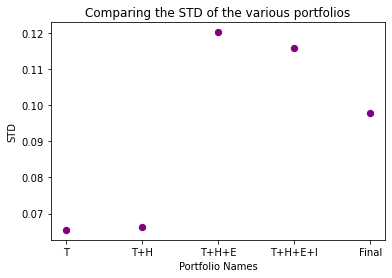

In [14]:
#Plot graphs
data={'Portfolio Names':['T','T+H','T+H+E','T+H+E+I','Final'],
     'STD':[std_tech,std_tech_health,std_t_h_e,std_t_h_e_i,std_final_portfolio]}
std_df=pd.DataFrame(data)

std_df.plot.scatter(x='Portfolio Names',y='STD',s=40,c='purple')

plt.title('Comparing the STD of the various portfolios')

plt.show()

## Discussion
Here we see that the risk(standard deviation) is relatively low for the first 2 portfolio and that almost doubles for the 3rd & 4th portfolio but reduces to around 9% for the final portfolio. This also shows that creating a basket of stocks from different industrys or assets types can reduce the overall risk a portfolio has. Even though it may reduce returns a bit, a investor will take that for some safety in return. 

In [15]:
%%latex
\newpage

<IPython.core.display.Latex object>

## Q2 Crypto Assets

### a)
In the same time period as Q1, form an equally weighted portfolio with $\$10,000$ containing Bitcoin (BTC-CAD) and Etherium (ETH-CAD).  If data isn't available early enough for both coins, start from whenever it is available (but end at the same date as the portfolio created above).   Comment on the effect of adding Etherium to Bitcoin holdings in a portfolio.  Perform whatever analysis you deem necessary to support your comments.



In [16]:
%%latex
\newpage

<IPython.core.display.Latex object>

In [17]:
#Bitcoin Portfolio
bitcoin=['BTC-CAD']
bitcoin_portfolio=portfolio_dataframe(bitcoin,10000)
std_bitcoin=bitcoin_portfolio['Monthly Returns'].std()

# BTC+ETH Portfolio
crypto=['BTC-CAD','ETH-CAD']
crypto_portfolio=portfolio_dataframe(crypto,10000)
crypto_std=crypto_portfolio['Monthly Returns'].std()

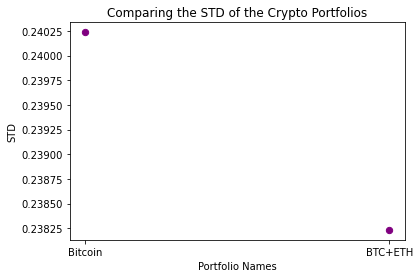

In [18]:
#Plot graphs
data={'Portfolio Names':['Bitcoin','BTC+ETH'],
     'STD':[std_bitcoin,crypto_std]}

std_df=pd.DataFrame(data)

std_df.plot.scatter(x='Portfolio Names',y='STD',s=40,c='purple')

plt.title('Comparing the STD of the Crypto Portfolios')

plt.show()

**We can clearly see from the graph, that when ETH is added in the risk is reduced by around 2%, showing diversifiction helps reduce the volatility/risk of the portfolio.**

### b)
Combine your portfolio in (a) of this question, with the portfolio of 25 stocks you created in question 1.  Your new portfolio will be equally weighted between the two portfolios, i.e., you will invest $\$5000$ in the cyrpto portfolio and $\$5000 in the inter-industy porfolio from question 1.  Discuss the total risk of the portfolio.

In [19]:
%%latex
\newpage

<IPython.core.display.Latex object>

In [20]:
#Create Crypto Portfolio with 5k
crypto_diverse=portfolio_dataframe(crypto,5000)
crypto_value=crypto_diverse['Portfolio Value']
crypto_returns=crypto_diverse['Monthly Returns']

#Calculating risk of this portfolio
std_crypto=crypto_returns.std()

#print crypto portfolio
crypto_diverse

,BTC-CAD Closing,ETH-CAD Closing,Portfolio Value,Monthly Returns
Date,,,,
2019-09-01,13561.018555,281.097778,5000.000000,NaN
2019-10-01,11028.660156,234.419556,4068.409570,-0.186318
2019-11-01,12185.297852,242.058395,4488.965397,0.103371
2019-12-01,9863.268555,200.852203,3635.325884,-0.190164
2020-01-01,9346.539062,169.793961,3437.455948,-0.054430
2020-02-01,12433.913086,243.140228,4579.160083,0.332136
2020-03-01,11505.412109,294.231903,4262.225417,-0.069212
2020-04-01,9351.528320,191.983246,3447.273284,-0.191203
2020-05-01,12644.259766,305.551422,4677.684711,0.356923


In [21]:
#print the risk of 5k crypto portfolio
std_crypto

0.23823319202818316

In [22]:
#Create inter-industry portfolio with 5k
diverse_final_portfolio=portfolio_dataframe(final_tickers,5000)
final_portfolio_value=diverse_final_portfolio['Portfolio Value']
final_portfolio_returns=diverse_final_portfolio['Monthly Returns']

#Calculating risk of this portfolio
std_final_portfolio_5k=final_portfolio_returns.std()

#print 5k inter-industry portfolio
diverse_final_portfolio

,KXS.TO Closing,BB.TO Closing,CSU.TO Closing,CTS.TO Closing,BB.TO Closing,WEED.TO Closing,WELL.TO Closing,TRIL.TO Closing,GUD.TO Closing,WELL.TO Closing,...,AC.TO Closing,SNC.TO Closing,CAE.TO Closing,BNS.TO Closing,FFH.TO Closing,CM.TO Closing,SLF.TO Closing,FFH.TO Closing,Portfolio Value,Monthly Returns
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,65.029999,9.640000,843.205078,0.50,9.640000,39.279999,0.475,2.630000,7.78,0.475,...,25.830000,45.541660,24.812300,59.064564,563.652771,88.410347,40.652424,563.652771,5000.000000,NaN
2019-02-01,78.309998,10.590000,967.845642,0.55,10.590000,63.900002,0.440,2.380000,7.86,0.440,...,30.219999,35.841881,27.506939,63.866211,585.836731,96.101952,42.869827,585.836731,5419.873210,0.083975
2019-03-01,76.320000,11.660000,1131.518921,0.58,11.660000,62.529999,0.540,0.900000,7.73,0.540,...,34.000000,36.048889,27.526608,62.871273,616.166138,96.706909,45.851269,616.166138,5775.256332,0.065570
2019-04-01,79.160004,12.750000,1140.994629,0.85,12.750000,56.759998,0.670,0.950000,7.36,0.670,...,33.560001,34.063042,29.508890,62.318348,584.607178,94.170135,47.453381,584.607178,5773.128840,-0.000368
2019-05-01,72.489998,12.190000,1196.381714,1.12,12.190000,68.190002,0.670,0.770000,7.36,0.670,...,32.869999,32.965832,30.821493,64.525551,613.830872,99.046745,50.593887,613.830872,5865.397562,0.015982
2019-06-01,77.139999,10.530000,1138.784424,0.98,10.530000,51.980000,0.750,0.480000,7.46,0.750,...,39.160000,23.743237,34.413879,60.619152,590.097351,90.335396,48.542316,590.097351,5617.162772,-0.042322
2019-07-01,83.050003,9.760000,1216.529907,0.80,9.760000,52.490002,0.950,0.430000,7.75,0.950,...,40.599998,26.104666,35.871311,62.754684,605.786255,92.428146,50.224434,605.786255,5765.560241,0.026419
2019-08-01,83.529999,9.610000,1256.757202,1.01,9.610000,41.340000,1.660,0.470000,7.54,1.660,...,44.980000,18.772337,35.703041,62.133976,579.736572,90.963867,49.084641,579.736572,5888.571863,0.021336
2019-09-01,78.419998,9.020000,1274.727417,1.16,9.020000,33.230000,1.640,0.380000,7.57,1.640,...,43.619999,15.763856,33.426437,62.462070,552.295288,91.301086,50.342316,552.295288,6085.029399,0.033363


In [23]:
#print risk of 5k inter-industry portfolio
std_final_portfolio_5k

0.09776035624357222

In [24]:
#Concat both portfolios together
diversified=pd.concat([crypto_diverse,diverse_final_portfolio],join='inner',axis=1,ignore_index=True).fillna(0)

#get ticker list
f_tickers=crypto+final_tickers

#drop the monthly and portfolio value returns of both
final_portfolio=diversified.drop(np.r_[2,3,29,30], 1)

#rename the columns
final_portfolio.columns=f_tickers

# make a new column for monthly returns and portfolio value
final_portfolio['Portfolio Value']=crypto_value+final_portfolio_value

final_portfolio['Monthly Returns']=final_portfolio['Portfolio Value'].pct_change()

#Calculate risk of this portfolio
risk_diversified_portfolio=final_portfolio['Monthly Returns'].std()

final_portfolio

,BTC-CAD,ETH-CAD,KXS.TO,BB.TO,CSU.TO,CTS.TO,BB.TO,WEED.TO,WELL.TO,TRIL.TO,...,AC.TO,SNC.TO,CAE.TO,BNS.TO,FFH.TO,CM.TO,SLF.TO,FFH.TO,Portfolio Value,Monthly Returns
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-01,13561.018555,281.097778,78.419998,9.020000,1274.727417,1.16,9.020000,33.230000,1.64,0.380000,...,43.619999,15.763856,33.426437,62.462070,552.295288,91.301086,50.342316,552.295288,11085.029399,NaN
2019-10-01,11028.660156,234.419556,84.010002,6.790000,1300.705444,0.98,6.790000,28.850000,1.54,0.410000,...,43.119999,17.382956,33.199467,66.941032,544.250671,97.793137,54.194805,544.250671,9980.144950,-0.099674
2019-11-01,12185.297852,242.058395,95.769997,7.230000,1298.470459,0.91,7.230000,25.900000,1.43,0.360000,...,46.990002,24.743393,33.398087,68.017838,548.063232,101.560638,54.900330,548.063232,10373.526379,0.039416
2019-12-01,9863.268555,200.852203,106.949997,7.300000,1383.377808,1.05,7.300000,24.100000,1.45,0.420000,...,49.470001,23.221083,35.175739,67.012817,571.672913,103.547798,56.473507,571.672913,9675.233724,-0.067315
2020-01-01,9346.539062,169.793961,103.589996,8.450000,1265.896973,1.48,8.450000,26.129999,1.54,1.910000,...,50.000000,29.592964,34.383419,66.097549,586.608826,98.603653,55.799084,586.608826,9457.733681,-0.022480
2020-02-01,12433.913086,243.140228,114.269997,8.260000,1410.839844,1.45,8.260000,29.370001,1.86,5.450000,...,44.779999,30.109871,39.544418,65.662270,587.480469,98.202782,58.609177,587.480469,10732.521823,0.134788
2020-03-01,11505.412109,294.231903,113.550003,6.770000,1366.164429,1.20,6.770000,24.790001,1.75,8.410000,...,34.570000,32.664589,36.874249,64.108833,559.602112,94.239685,55.798943,559.602112,7938.207720,-0.260360
2020-04-01,9351.528320,191.983246,104.910004,4.740000,1283.844971,0.91,4.740000,19.240000,1.57,4.990000,...,14.460000,18.652439,16.600000,49.401138,389.147888,72.430611,40.939396,389.147888,6410.238314,-0.192483
2020-05-01,12644.259766,305.551422,142.500000,5.740000,1344.607178,1.27,5.740000,21.430000,2.20,6.540000,...,19.299999,23.984550,22.629999,50.109161,349.769592,75.139328,44.049305,349.769592,7723.252820,0.204831


In [25]:
#print risk of final_portfolio
risk_diversified_portfolio

0.1864367031098521

## Risk of this portfolio
**We see the risk of the 5k crypto portfolio is around 23% and the risk of the 5k inter-industry portfolio is around 9%(so less riskier on average). When we combine the portfolio together and calculate the new risk of the equally weighted portfolio we find the risk to be 18%. This shows that when assets are combined together in a basket, it lowers the overall risk of the portfolio. Even though this combined portfolio has a higher risk compared to when inter-industry was by itself, with risk comes reward and by adding in crypto, we might be able to maximize returns based on how volitile crypto is at the moment being deregulated.** 

### c)
Instead of assuming equal weight on the cyrpto and inter-industry portfolio, you now must determine what is the optimal weight on each portfolio if your goal is to maximize the portfolio sharpe ratio, $S=\frac{R_P-R_f}{\sigma_P}$. Where S is the sharpe ratio, $R_P$ is the expected return of the portfolio, found by taking a simple arithmetic average, $R_f$ is the risk-free rate, and $\sigma_P$ is the standard deviation of portfolio returns.  To make things easier, we will assume the risk-free rate is zero, since these days it is close enough to zero anyways.

To perform this analysis, you should use a for loop, and iterate over the integers from 0 to 100, which will represent the weights.  Thus, we are simplying things so that you only have to compare 100 portfolios.

You should make sure to print out the optimal weights, and discuss why an investor may wish to invest in this fashion.

In [26]:
# Yearly Returns for individual companies
inter_er=final_portfolio.iloc[:,0:27].resample('Y').last().pct_change().mean()

In [27]:
# Volatility is given by the annual standard deviation. We multiply by 12 because there are 12 trading months/year.
adj_close_df=final_portfolio.iloc[:,0:27]
ann_sd = adj_close_df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(12))

In [28]:
# Log of percentage change
cov_matrix = adj_close_df.pct_change().apply(lambda x: np.log(1+x)).cov()

In [29]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(final_portfolio.columns)-2
num_portfolios = 100

In [30]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, inter_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(12) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [31]:
data={'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(adj_close_df.columns.tolist()):
    data[symbol+' weight']=[w[counter] for w in p_weights]

In [32]:
hunnidportfolios=pd.DataFrame(data)

#print hundred portfolios
hunnidportfolios

,Returns,Volatility,BTC-CAD weight,ETH-CAD weight,KXS.TO weight,BB.TO weight,CSU.TO weight,CTS.TO weight,WEED.TO weight,WELL.TO weight,...,CVE.TO weight,IPL.TO weight,CP.TO weight,CAE.TO weight,AC.TO weight,SNC.TO weight,BNS.TO weight,FFH.TO weight,CM.TO weight,SLF.TO weight
0,2.483297,0.559323,0.077295,0.061813,0.047402,0.065118,0.040812,0.049967,0.043698,0.014052,...,0.026815,0.068665,0.016376,0.024659,0.002965,0.040035,0.021587,0.031783,0.060154,0.010933
1,2.071559,0.567692,0.063041,0.075873,0.017907,0.057690,0.087129,0.055741,0.002921,0.001960,...,0.033487,0.037197,0.015303,0.007308,0.035025,0.075825,0.065354,0.006908,0.032891,0.030243
2,1.713563,0.459622,0.030397,0.091589,0.066648,0.043944,0.008661,0.004412,0.046600,0.012261,...,0.005706,0.014405,0.009792,0.025311,0.060056,0.034455,0.064927,0.035720,0.070550,0.014200
3,1.878005,0.460499,0.053895,0.061173,0.038637,0.052081,0.040241,0.009052,0.043181,0.015595,...,0.033318,0.001309,0.063942,0.061313,0.010942,0.013356,0.043752,0.055596,0.049228,0.065545
4,0.736871,0.474925,0.056547,0.055861,0.018166,0.010304,0.068198,0.065982,0.026339,0.009474,...,0.005781,0.046609,0.037864,0.024282,0.049286,0.014952,0.059250,0.052093,0.016544,0.029388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.411484,0.573721,0.057602,0.019486,0.016917,0.008764,0.024198,0.052656,0.047051,0.013310,...,0.046387,0.062415,0.069179,0.057785,0.018873,0.007560,0.040413,0.018393,0.019681,0.046954
96,2.340219,0.580078,0.029927,0.050994,0.048385,0.019603,0.017190,0.015108,0.059744,0.023571,...,0.050635,0.053521,0.035405,0.033887,0.021060,0.017455,0.069382,0.029123,0.018249,0.062554
97,0.885107,0.473321,0.038076,0.004206,0.024935,0.002644,0.076541,0.024479,0.068064,0.037235,...,0.014051,0.046390,0.065072,0.017493,0.000067,0.011454,0.054696,0.003280,0.019386,0.072176
98,0.762004,0.437819,0.061233,0.009117,0.057362,0.006963,0.046672,0.024047,0.060576,0.006609,...,0.072702,0.018514,0.023992,0.071976,0.029774,0.031083,0.021326,0.053471,0.001129,0.078798


In [33]:
# Finding the optimal portfolio using sharpe 
rf=0.00 #risk factor is bascially nothing now
optimal_risky_portfolio=hunnidportfolios.iloc[((hunnidportfolios['Returns']-rf)/hunnidportfolios['Volatility']).idxmax()]

In [34]:
optimal_risky_portfolio=pd.DataFrame(optimal_risky_portfolio)

In [35]:
#Print the optimal portfolio
optimal_risky_portfolio.T

,Returns,Volatility,BTC-CAD weight,ETH-CAD weight,KXS.TO weight,BB.TO weight,CSU.TO weight,CTS.TO weight,WEED.TO weight,WELL.TO weight,...,CVE.TO weight,IPL.TO weight,CP.TO weight,CAE.TO weight,AC.TO weight,SNC.TO weight,BNS.TO weight,FFH.TO weight,CM.TO weight,SLF.TO weight
89,2.63605,0.446585,0.027177,0.063289,0.041696,0.00892,0.048564,0.063819,0.068864,0.048164,...,0.026061,0.007813,0.002106,0.014517,0.005824,0.072161,0.049862,0.038104,0.038584,0.004046


In [36]:
min_vol_port=hunnidportfolios.iloc[hunnidportfolios['Volatility'].idxmin()]

#Print minimum volatility Portfolio out of 100 portfolios
min_vol_port

Returns           0.572730
Volatility        0.404157
BTC-CAD weight    0.003022
ETH-CAD weight    0.029668
KXS.TO weight     0.025694
BB.TO weight      0.044588
CSU.TO weight     0.086945
CTS.TO weight     0.078179
WEED.TO weight    0.070577
WELL.TO weight    0.010819
TRIL.TO weight    0.004415
GUD.TO weight     0.018222
TRP.TO weight     0.045488
MEG.TO weight     0.010466
CVE.TO weight     0.072465
IPL.TO weight     0.013121
CP.TO weight      0.084228
CAE.TO weight     0.040420
AC.TO weight      0.009691
SNC.TO weight     0.016392
BNS.TO weight     0.058297
FFH.TO weight     0.013165
CM.TO weight      0.018226
SLF.TO weight     0.081081
Name: 25, dtype: float64

# Why you should invest in the optimal portfolio
We are trying to maximize the returns while keeping the volatility as low as possible. When we look at the `min_vol_port` it is the most efficient portfolio having the minimum amount of volatility but the return is half of the `optimal_risky_portfolio` of 155% vs. 299% over the same time period. Any sensible investor wants to maximize their returns even if it means more risk. That's why we calculate the sharpe ratio for all the portfolios and returned the maximum sharpe ratio. 